In [425]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Crop LED

In [2]:
file_folder=r'C:\data\fust\video\raw_videos'

In [3]:
files = glob.glob(file_folder + '/*.avi', recursive=True)

In [424]:
files

['C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33024 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33025 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33026 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33027 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33028 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33032 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33033 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33034 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33037 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33052 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33053 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33055 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33056 - Event Logs.xlsx',

In [17]:
# crop LED
for i in np.arange(len(files)-len(files)+3):
    cap = cv2.VideoCapture(files[i])
    cnt = 0
    w_frame, h_frame = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps, frames = cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT)
#    x,y,h,w = 250,560,80,80
    x,y,h,w = 250,560,80,80
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(files[i][30:-4]+'_LED.avi', fourcc, fps, (w, h))
    while(cap.isOpened()):
        ret, frame = cap.read()
        cnt += 1 # Counting frames

    # Avoid problems when video finish
        if ret==True:
            crop_frame = frame[y:y+h, x:x+w]
            xx = cnt *100/frames
            out.write(crop_frame)
            #cv2.imshow('frame',frame)
            #cv2.imshow('croped',crop_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break


    cap.release()
    out.release()
    cv2.destroyAllWindows()

## LED red value extraction and onset detection
This step is to check when the LED is on

In [441]:
file_folder=r'C:\data\fust\video\LED_Ale'

In [442]:
files = glob.glob(file_folder + '/*.avi', recursive=True)

In [443]:
files

['C:\\data\\fust\\video\\LED_Ale\\07082020_33024_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33025_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33026_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33027_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33028_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33032_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33033_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33034_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33037_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33052_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33053_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33054_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33055_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33056_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33057_LED.avi',
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33062_LED.avi']

In [10]:
led=files[0]
cap = cv2.VideoCapture(led)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

9458


In [30]:
files[0][36:-4]

'33024_LED'

In [452]:
# https://stackoverflow.com/questions/25359288/how-to-know-total-number-of-frame-in-a-file-with-cv2-in-python
# https://www.kaggle.com/c/deepfake-detection-challenge/discussion/124099
# https://stackoverflow.com/questions/29188423/polarizing-an-image-how-to-find-the-average-of-each-rgb-value
# Reading a specific frame in a training video using OpenCv in Python
led_on=[]
for i in np.arange(len(files)):
    led_r=[]
    peaks=[]
    led=files[i]
    cap = cv2.VideoCapture(led)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for j in np.arange(length):
        cap.set(1,j); # Where frame_no is the frame you want
        ret, img = cap.read() # Read the frame
        #cv2.imshow('window_name', frame) # show frame on window
        #led_r.append(img.item(10,10,2))# read the red value of every frame
        led_r.append(np.array(img).mean(axis=(0,1))[0])# read the red value of every frame
    led_r=np.array(led_r)
    peaks, _ = find_peaks(led_r, height=135)
    led_on.append(peaks)
    plt.plot(led_r)
    plt.plot(peaks, led_r[peaks], "x")
    plt.plot(np.zeros_like(led_r), "--", color="gray")
    plt.xlabel('Frame Number')
    plt.ylabel('Red Value')
    plt.title(files[i][36:-4])
    plt.savefig(files[i][36:-4] +'.jpg')
    plt.close()
    #plt.show()

In [453]:
[item for sublist in zip(files,led_on) for item in sublist]

['C:\\data\\fust\\video\\LED_Ale\\07082020_33024_LED.avi',
 array([  42, 2542, 5042, 7542], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33025_LED.avi',
 array([  68,   96, 2596, 5089, 5966, 5969, 7587], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33026_LED.avi',
 array([  76, 2566, 5066, 7566], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33027_LED.avi',
 array([ 105, 2604, 5104, 7604], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33028_LED.avi',
 array([ 199, 2699, 5149, 7535], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33032_LED.avi',
 array([  113,  2612,  5105,  7593, 10067], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33033_LED.avi',
 array([  58, 2558, 5058, 7558], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33034_LED.avi',
 array([ 183, 2683, 5183, 7683], dtype=int64),
 'C:\\data\\fust\\video\\LED_Ale\\07082020_33037_LED.avi',
 array([  676,   678,   680,   684,   686,   690,   693,   695, 

In [451]:
led_onset_frame=np.array([42, 96, 66, 104, 199, 112, 58, 183, 2520, 11, 73, 66, 106, 40, 40])
led_onset=led_onset_frame/25
snif_trim=np.array([89.28, 90.92, 92.52, 83, 107.24, 100.6, 85.64, 97.84, 397.28, 92.36, 110.53, 83.04, 87.88, 81.48, 83.68])
mice_id= np.array([33024, 33025, 33026, 33027, 33028, 33032, 33033, 33034, 33037, 33052, 33053, 33055, 33056, 33057, 33062])
#special case mice_ID 33054, no observer data is shown, so the relative value is taken away for the moment (led_onset_frame 61, led_onset xxx)

In [450]:
len(led_onset_frame)

16

In [73]:
led_onset, snif_trim, mice_id

(array([  1.68,   3.84,   2.64,   4.16,   4.48,   2.32,   7.32, 100.8 ,
          0.44,   2.92,   2.44,   2.64,   4.24,   1.6 ,   1.6 ]),
 array([ 89.28,  90.92,  92.52,  83.  , 100.6 ,  85.64,  97.84, 379.28,
         92.36, 110.53, 107.24,  83.04,  87.88,  81.48,  83.68]),
 array([33024, 33025, 33026, 33027, 33032, 33033, 33034, 33037, 33052,
        33053, 33054, 33055, 33056, 33057, 33062]))

#### special case mice_ID 33028, no observer data is shown, so the relative value is taken away for the moment (led_onset_frame 199, led_onset 7.96)

## import sniffing evvents

In [76]:
events_folder=r'C:\data\fust\snif_events'
events_files = glob.glob(file_folder + '/*.xlsx', recursive=True)
events_files

['C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33024 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33025 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33026 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33027 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33028 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33032 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33033 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33034 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33037 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33052 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33053 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33055 - Event Logs.xlsx',
 'C:\\data\\fust\\snif_events\\FUST rescore 17-9 - 33056 - Event Logs.xlsx',

In [454]:
df_snif = pd.read_excel(events_files[0])

In [455]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
snif_water_onset=df_snif['Behavior'].str.contains('sniffing water', regex=False)&df_snif['Event_Type'].str.contains('start', regex=False)
snif_water_offset=df_snif['Behavior'].str.contains('sniffing water', regex=False)&df_snif['Event_Type'].str.contains('stop', regex=False)
snif_urine_onset=df_snif['Behavior'].str.contains('sniffing urine', regex=False)&df_snif['Event_Type'].str.contains('start', regex=False)
snif_urine_offset=df_snif['Behavior'].str.contains('sniffing urine', regex=False)&df_snif['Event_Type'].str.contains('stop', regex=False)
# https://stackoverflow.com/questions/21448225/getting-indices-of-true-values-in-a-boolean-list
water_on_indice=[i for i, x in enumerate(snif_water_onset) if x]
water_off_indice=[i for i, x in enumerate(snif_water_offset) if x]
urine_on_indice=[i for i, x in enumerate(snif_urine_onset) if x]
urine_off_indice=[i for i, x in enumerate(snif_urine_offset) if x]
#
water_on=np.array(df_snif['Time_Relative_sf'][water_on_indice]+snif_trim[0]-led_onset[0])
water_off=np.array(df_snif['Time_Relative_sf'][water_off_indice]+snif_trim[0]-led_onset[0])
water_dur=np.array(df_snif['Duration_sf'][water_on_indice])
urine_on=np.array(df_snif['Time_Relative_sf'][urine_on_indice]+snif_trim[0]-led_onset[0])
urine_off=np.array(df_snif['Time_Relative_sf'][urine_off_indice]+snif_trim[0]-led_onset[0])
urine_dur=np.array(df_snif['Duration_sf'][urine_on_indice])

## import FP recordings

In [459]:
recordings_folder=r'C:\data\fust\recordings'
recordings = glob.glob(recordings_folder + '/*.csv', recursive=True)
recordings

['C:\\data\\fust\\recordings\\DS_33024_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33025_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33026_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33027_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33028_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33032_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33033_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33034_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33052_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33053_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33055_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33057_200807.csv',
 'C:\\data\\fust\\recordings\\DS_33062_200807.csv']

In [460]:
    # Read data from file 'filename.csv' 
file_to_open = recordings[0]
    # Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv(file_to_open)

In [461]:
df

,Time(s),AIn-1 - Demodulated(Lock-In),DI/O-1,AIn-2 - Demodulated(Lock-In)
0,0.001,0.074719,1,0.138096
1,0.002,0.074211,1,0.138020
2,0.003,0.073702,1,0.138096
3,0.004,0.073550,1,0.138020
4,0.005,0.073778,1,0.138096
...,...,...,...,...
372995,372.996,0.095218,0,0.150151
372996,372.997,0.095218,0,0.150151
372997,372.998,0.095218,0,0.150151
372998,372.999,0.095218,0,0.150151


In [462]:
df.columns = ['times', 'ch1', 'chDIO1', 'ch2']
miceNO=str(recordings[0][-16:-11])
expdate=str(recordings[0][-10:-4])
filename=str(recordings[0][-16:-4])

In [463]:
## trial basis definition

SR=1000 #sampling rate in Hz
prestart=3 # sec, duration before trial start relative to trigger
poststart=5 # sec, duriation after trial start relative to trigger
basestart=0 # sec, baseline start for calculating dFF0 relative to trial start trigger
baseend=1 # sec, baseline end for calculating dFF0 relative to trial start trigger
timevec=np.arange(-prestart, poststart, 1/SR)
timevec1 = np.arange(0,(len(df['ch1'])/SR), 1/SR)
t=np.arange(len(df.index))

In [464]:
# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(df['ch2'], df['ch1'], 1)
fit_405=reg[0]*df['ch2']+reg[1]
dFF=(df['ch1']-fit_405)/fit_405 #this gives deltaF/F
df['fit_405']=fit_405
df['dFF']=dFF

In [465]:
water_on

array([ 87.76,  92.24,  94.48,  97.88, 106.48, 117.16, 143.72, 158.  ,
       167.32, 199.56, 204.92, 298.32, 316.44, 364.52])

In [466]:
Trace_water=np.zeros((water_on.size, (poststart-(-prestart))*SR));
Trace_urine=np.zeros((urine_on.size, (poststart-(-prestart))*SR));
dFF0_water=np.zeros((water_on.size, (poststart-(-prestart))*SR));
dFF0_urine=np.zeros((urine_on.size, (poststart-(-prestart))*SR));

In [467]:
for i in range(water_on.size):
    Trace_water[i:]=dFF[int(water_on[i]*SR-SR*prestart):int(water_on[i]*SR+SR*poststart)]
for i in range(urine_on.size):
    Trace_urine[i:]=dFF[int(urine_on[i]*SR-SR*prestart):int(urine_on[i]*SR+SR*poststart)]

In [468]:
## calculate water sniffing traces
MeanTrace_water=np.mean(Trace_water,axis=0)

for i in range(water_on.size):
    dFF0_water[i,:]=Trace_water[i,:]-(np.mean(Trace_water[i][int(basestart*SR):int(baseend*SR)], axis=0))

meandFF0_water=np.mean(dFF0_water,axis=0);

## calculate urine traces
MeanTrace_urine=np.mean(Trace_urine,axis=0)

for i in range(urine_on.size):
    dFF0_urine[i,:]=Trace_urine[i,:]-(np.mean(Trace_urine[i][int(basestart*SR):int(baseend*SR)], axis=0))

meandFF0_urine=np.mean(dFF0_urine,axis=0);

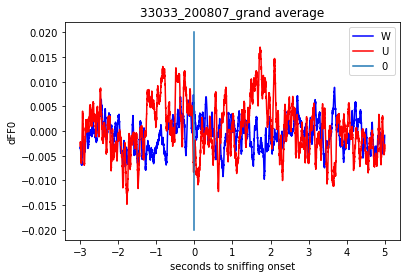

In [469]:
plt.plot(timevec,meandFF0_water,'b',timevec,meandFF0_urine,'r',[0, 0],[-0.02, 0.02])
plt.xlabel('seconds to sniffing onset')
plt.ylabel('dFF0')
plt.title(recordings[i][-16:-4] + '_grand average')
plt.legend('WU0')
plt.savefig(recordings[i][-16:-4] +'_avg.jpg', dpi=300)

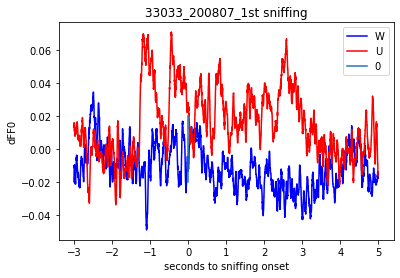

In [470]:
plt.plot(timevec,dFF0_water[0],'b',timevec,dFF0_urine[0],'r',[0, 0],[-0.02, 0.02])
plt.xlabel('seconds to sniffing onset')
plt.ylabel('dFF0')
plt.title(recordings[i][-16:-4] + '_1st sniffing')
plt.legend('WU0')
plt.savefig(recordings[i][-16:-4] +'_1st.jpg', dpi=300)

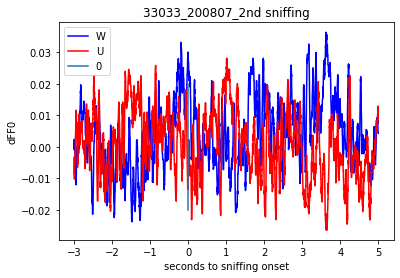

In [471]:
plt.plot(timevec,dFF0_water[1],'b',timevec,dFF0_urine[1],'r',[0, 0],[-0.02, 0.02])
plt.xlabel('seconds to sniffing onset')
plt.ylabel('dFF0')
plt.title(recordings[i][-16:-4] + '_2nd sniffing')
plt.legend('WU0')
plt.savefig(recordings[i][-16:-4] +'_2nd.jpg', dpi=300)

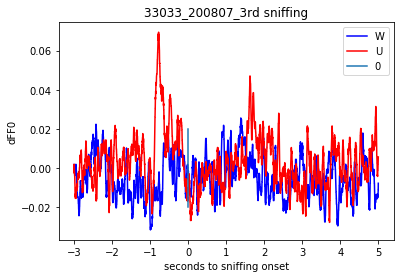

In [472]:
plt.plot(timevec,dFF0_water[2],'b',timevec,dFF0_urine[2],'r',[0, 0],[-0.02, 0.02])
plt.xlabel('seconds to sniffing onset')
plt.ylabel('dFF0')
plt.title(recordings[i][-16:-4] + '_3rd sniffing')
plt.legend('WU0')
plt.savefig(recordings[i][-16:-4] +'_3rd.jpg', dpi=300)

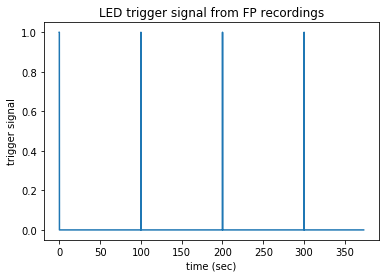

In [481]:
plt.plot(timevec1, df['chDIO1'])
plt.xlabel('time (sec)')
plt.ylabel('trigger signal')
plt.title('LED trigger signal from FP recordings')
plt.savefig('LED_trigger.jpg', dpi=300)